In [ ]:
import cv2

cv2.imshow('Image Title', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 1번 문제: 이미지를 불러오고 크기를 변경하는 코드이다. 코드를 완성하시오.
### 출력예시:
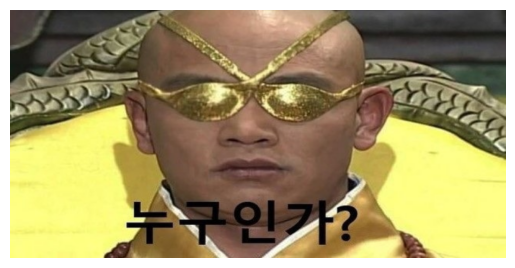

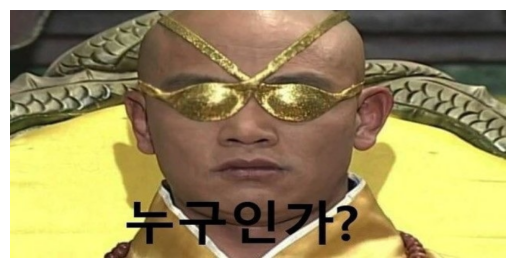

In [ ]:
import cv2
from matplotlib import pyplot as plt

class ImageProcessor:
    def __init__(self):
        self.image = None

    def load_image(self, filepath):
        self.image = cv2.imread(filepath)

    def resize_image(self, width, height):
        self.image = cv2.resize(self.image, (width, height))

    def show_image(self):
        # OpenCV는 BGR 형식이므로 RGB로 변환해야 합니다.
        image_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.axis('off')  # 축을 숨깁니다.
        plt.show()

processor = ImageProcessor()
processor.load_image('image.jpg')
processor.resize_image(800, 400)
processor.show_image()


# 2번 문제: 문제 2: cv2 라이브러리를 사용하여 EdgeDetector 클래스를 구현하고, 이미지를 그레이스케일로 변환한 후 Canny 엣지 검출을 수행하세요.
### 출력 예시:
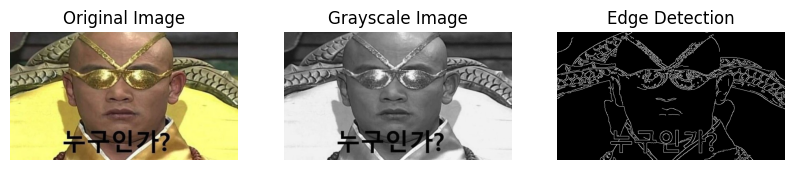

In [ ]:
import cv2
from matplotlib import pyplot as plt

class EdgeDetector:
    def __init__(self):
        self.image = None
        self.gray_image = None
        self.edges = None

    def load_image(self, filepath):
        self.image = cv2.imread(filepath)

    def convert_to_grayscale(self):
        self.gray_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)

    def detect_edges(self, threshold1, threshold2):
        self.edges = cv2.Canny(self.gray_image, threshold1, threshold2)

    def show_images(self):
        # OpenCV는 BGR 형식이므로 RGB로 변환
        image_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 4))

        # 원본 이미지 표시
        plt.subplot(1, 3, 1)
        plt.imshow(image_rgb)
        plt.title('Original Image')
        plt.axis('off')

        # 그레이스케일 이미지 표시
        plt.subplot(1, 3, 2)
        plt.imshow(self.gray_image, cmap='gray')
        plt.title('Grayscale Image')
        plt.axis('off')

        # 엣지 이미지 표시
        plt.subplot(1, 3, 3)
        plt.imshow(self.edges, cmap='gray')
        plt.title('Edge Detection') 
        plt.axis('off')

        plt.show()

detector = EdgeDetector()
detector.load_image('image.jpg')
detector.convert_to_grayscale()
detector.detect_edges(100, 200)
detector.show_images()


# 3번 문제: cv2 라이브러리를 사용하여 ColorTracker 클래스를 구현하고, 이미지에서 특정 색상의 객체를 추적하여 해당 영역을 강조하세요.
### 출력 예시:
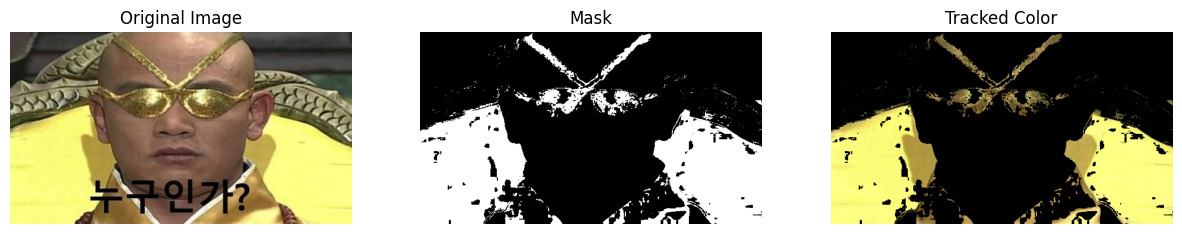

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

class ColorTracker:
    def __init__(self):
        self.image = None
        self.mask = None
        self.result = None

    def load_image(self, filepath):
        self.image = cv2.imread(filepath)

    def track_color(self, lower_color, upper_color):
        hsv = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)
        self.mask = cv2.inRange(hsv, lower_color, upper_color)
        self.result = cv2.bitwise_and(self.image, self.image, mask=self.mask)

    def show_result(self):
        # OpenCV는 BGR 형식이므로 RGB로 변환
        image_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        result_rgb = cv2.cvtColor(self.result, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(15, 5))

        # 원본 이미지 표시
        plt.subplot(1, 3, 1)
        plt.imshow(image_rgb)
        plt.title('Original Image')
        plt.axis('off')

        # 마스크 이미지 표시
        plt.subplot(1, 3, 2)
        plt.imshow(self.mask, cmap='gray')
        plt.title('Mask')
        plt.axis('off')

        # 트래킹된 색상 이미지 표시
        plt.subplot(1, 3, 3)
        plt.imshow(result_rgb)
        plt.title('Tracked Color')
        plt.axis('off')

        plt.show()

tracker = ColorTracker()
tracker.load_image('image.jpg')
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])
tracker.track_color(lower_yellow, upper_yellow)
tracker.show_result()


# 4번 문제: 일론 머스크가 범죄자가 되었다 가정하고, 얼굴을 인식하여 모자이크 처리하시오.
### 출력 예시:
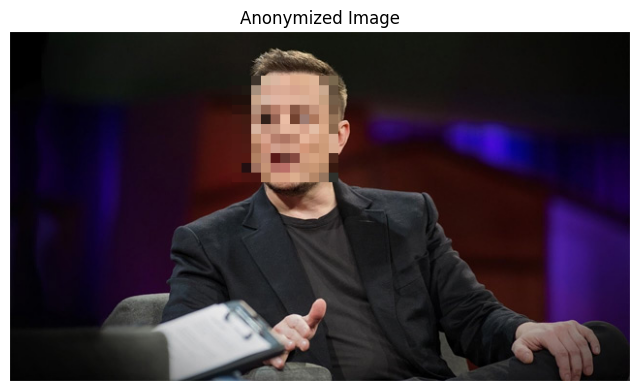

In [ ]:
import cv2
from matplotlib import pyplot as plt

class FaceAnonymizer:
    def __init__(self):
        # 다른 분류기 사용 예시
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
        self.image = None

    def load_image(self, filepath):
        self.image = cv2.imread(filepath)

    def anonymize_faces(self):
        gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            roi = self.image[y:y+h, x:x+w]
            roi = cv2.resize(roi, (w//10, h//10))
            roi = cv2.resize(roi, (w, h), interpolation=cv2.INTER_AREA)
            self.image[y:y+h, x:x+w] = roi

    def show_image(self):
        # OpenCV는 BGR 형식이므로 RGB로 변환
        image_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(8, 6))
        plt.imshow(image_rgb)
        plt.title('Anonymized Image')
        plt.axis('off')
        plt.show()

anonymizer = FaceAnonymizer()
anonymizer.load_image('image2.jpg')
anonymizer.anonymize_faces()
anonymizer.show_image()


# 5번 문제: SIFT 알고리즘을 사용하여 '궁예의 누구인가' 짤의 특징점을 검출하고 표기해보자.
### 출력 예시:
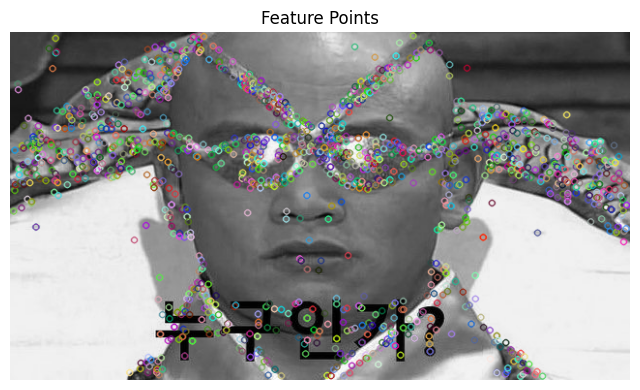

In [ ]:
import cv2

class FeatureDetector:
    def __init__(self):
        self.image = None
        self.keypoints = None
        self.output_image = None

    def load_image(self, filepath):
        image = cv2.imread(filepath)
        if image is None:
            print("이미지를 로드할 수 없습니다. 파일 경로를 확인하세요.")
        else:
            self.image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    def detect_features(self):
        sift = cv2.SIFT_create()
        self.keypoints = sift.detect(self.image, None)

    def draw_keypoints(self):
        self.output_image = cv2.drawKeypoints(self.image, self.keypoints, None)

    def show_image(self):
        image_rgb = cv2.cvtColor(self.output_image, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(8, 6))
        plt.imshow(image_rgb)
        plt.title('Feature Points')
        plt.axis('off')
        plt.show()

detector = FeatureDetector()
detector.load_image('image.jpg')
detector.detect_features()
detector.draw_keypoints()
detector.show_image()